In [1]:
%run ../../import_src.py

import lymedata
from lymedata import *
import constants
from constants import *

import needell_ssnmf
from needell_ssnmf import Needell_SSNMF

import display_ssnmf
from display_ssnmf import *


In [ ]:
# CNS1 Defn
data = LymeData({CHRONIC, NEURO, NON_NEURO},{ADDL_CIR, DIAG_CIR, CATG},{NEURO, NON_NEURO}, defn=DEF_CNS1, drop_99=True)
print(data.df.shape)
print(data.df.columns)

data_matrix, label_matrix = data.get_data_and_labels()

ssnmf = Needell_SSNMF(data_matrix, label_matrix)
best_accuracy, best_params, accu_distr, Xreconerr_distr, Yreconerr_distr, X_cvtst_reconerr_distr = ssnmf.gridsearch(param_range={'k': range(2,36),'lambda': np.linspace(0,1,10), 'random_state': range(0,10)},
                                                          get_topic_accu_distr=True, get_reconerr_distr=True)
# Total Neuro: 2569
# Total Non-Neuro: 1394

Both Neuro and Mus: 2259
Only Neuro: 310
Only Mus: 762
Neither Neuro nor Mus: 632
Dropping 99
(878, 29)
Index(['recall a tick bite', 'length of time noticed tick bite',
       'treated with antibiotics', 'length of time treated for tick bite',
       'period of time for diagnosis', 'misdiagnosis', 'tick born coinfection',
       'Babesia', 'Bartonella', 'Ehrlichia/ Anaplasma', 'Mycoplasma',
       'Rickettsia', 'Bio Sex', 'Antibiotics', 'Times Infected', 'GROC',
       'Bed Days', 'Mental Health Days', 'Physical Health Days', 'Disability',
       'general practitioner', 'infectious disease specialist', 'internist',
       'lyme specialist', 'other doctor', 'pediatrician', 'rheumatologist',
       'neuro', 'non_neuro'],
      dtype='object')


/home/reu24lyme/alex/code_lib/src/lymedata.py:74: DtypeWarning: Columns (224,249,259,269,274,294,299,304,309,339,344,365,369,373,377,395,399,403,411,415,419,423,435) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


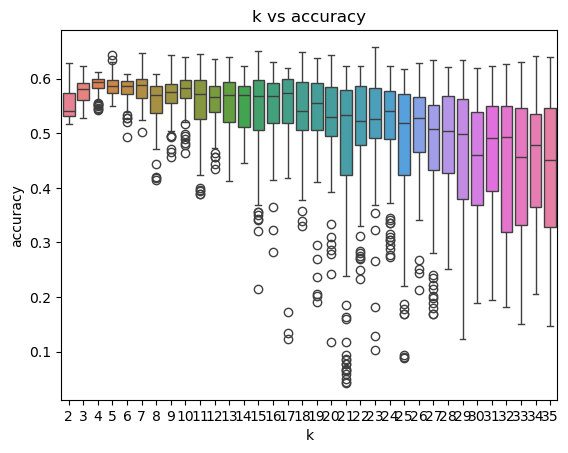

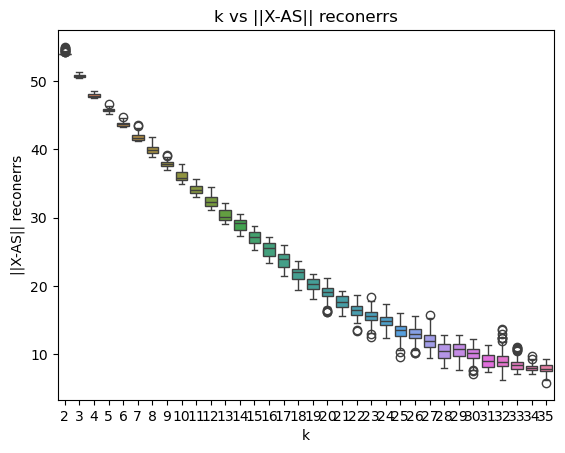

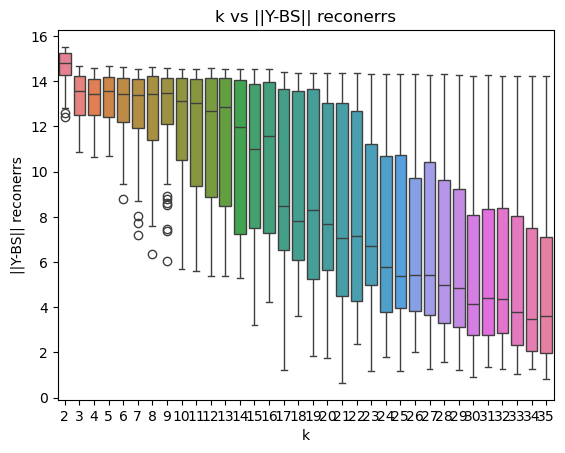

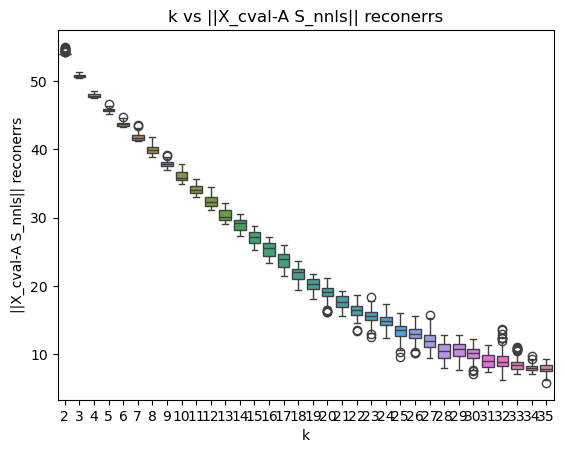

CNS1 Working Definition: Neuro vs Musculo
best accuracy:  0.6580851063829787  best params:  {'k': 23, 'lambda': 0.1111111111111111, 'random_state': 7}
test_accuracy:  0.6363636363636364


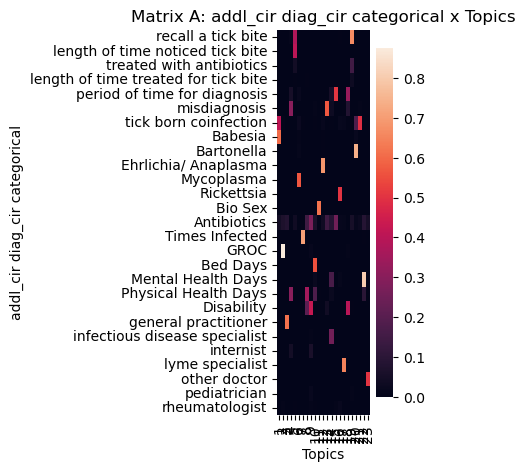

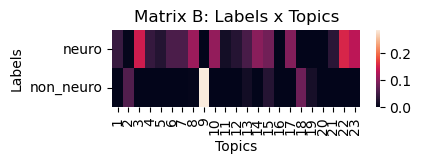

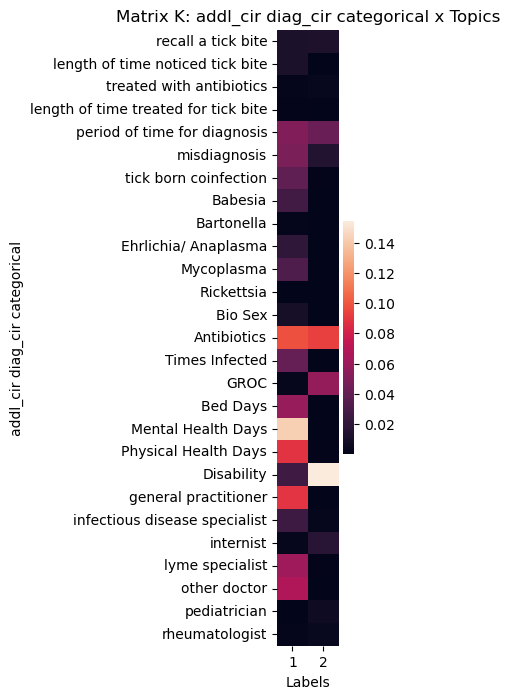

In [5]:
display_distr(accu_distr)
display_distr(Xreconerr_distr, ylabel='||X-AS|| reconerrs')
display_distr(Yreconerr_distr, ylabel='||Y-BS|| reconerrs')
display_distr(X_cvtst_reconerr_distr, ylabel='||X_cval-A S_nnls|| reconerrs')

print('CNS1 Working Definition: Neuro vs Musculo')
print('best accuracy: ', best_accuracy, ' best params: ', best_params)
test_accuracy= ssnmf.test(best_params)
print('test_accuracy: ', test_accuracy)

names = ADDL_CIR + " "+ DIAG_CIR + " " + CATG
labels = [x for x in data.df.columns if x not in [NEURO, NON_NEURO]]
best_model = ssnmf.best_model
display_ssnmf(model=best_model, feature_name=names, feature_labels=labels, class_labels=data.labels)


In [6]:
accu_distr.to_csv('CNS1_NvN_Cr_Nd_k2-36_l10_r10_Accu.csv', index=False)
Xreconerr_distr.to_csv('CNS1_NvN_Cr_Nd_k2-36_l10_r10_Xrec.csv', index=False)
Yreconerr_distr.to_csv('CNS1_NvN_Cr_Nd_k2-36_l10_r10_Yrec.csv', index=False)

In [7]:
# Accuracy distribution statistics
mean = accu_distr.mean()
Q1 = accu_distr.quantile(0.25)
Q3 = accu_distr.quantile(0.75)
print('Mean Accuracy:')
print(mean)
print('IQR:')
print(Q3 - Q1)

Mean Accuracy:
2     0.554806
3     0.577529
4     0.589247
5     0.585661
6     0.580460
7     0.581808
8     0.557017
9     0.570246
10    0.577867
11    0.555786
12    0.558910
13    0.555846
14    0.551557
15    0.536499
16    0.543621
17    0.546442
18    0.534499
19    0.529455
20    0.518609
21    0.454886
22    0.506661
23    0.519223
24    0.511643
25    0.479710
26    0.502443
27    0.473976
28    0.489038
29    0.465290
30    0.450655
31    0.465076
32    0.450310
33    0.440307
34    0.448945
35    0.437594
dtype: float64
IQR:
2     0.041657
3     0.030286
4     0.017842
5     0.022781
6     0.022799
7     0.035598
8     0.049334
9     0.035925
10    0.031583
11    0.070081
12    0.046910
13    0.073713
14    0.075600
15    0.091841
16    0.072941
17    0.081740
18    0.088665
19    0.086568
20    0.089997
21    0.156768
22    0.108835
23    0.090747
24    0.087812
25    0.149460
26    0.100540
27    0.119048
28    0.141064
29    0.183741
30    0.170818
31    0.156852
32   

In [ ]:
# Xreconerr distribution statistics
mean = Xreconerr_distr.mean()
Q1 = Xreconerr_distr.quantile(0.25)
Q3 = Xreconerr_distr.quantile(0.75)
print('Mean Xreconerr_distr:')
print(mean)
print('IQR:')
print(Q3 - Q1)

In [ ]:
# Yreconerr distribution statistics
mean = Yreconerr_distr.mean()
Q1 = Yreconerr_distr.quantile(0.25)
Q3 = Yreconerr_distr.quantile(0.75)
print('Mean Yreconerr_distr:')
print(mean)
print('IQR:')
print(Q3 - Q1)

In [ ]:
print(data.labels)